<a href="https://colab.research.google.com/github/markcastorm/Variational_quantum_Classifier/blob/main/Variational_quantum_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variational Quantum Classifier

A Variational Quantum Classifier  is a given type of machine learning algorithm that uses a quantum computer to perform classifiction tasks.
A quantum cicuit (ansatz) is used to encode the input data in to a quantum state in Variational quantum clasifiers,the encoded state is then evolved using  set of parmeters called variational parameters which are optimized in order to minimize the difference between the output state and the target state.

After the optimization is done the output is then measured and the results used for making predictions on the input data

In [1]:
!pip install qiskit
!pip install qiskit-aer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Varitional Ansatz

Heuristic Ansatz

In [3]:
!pip install pylatexenc

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


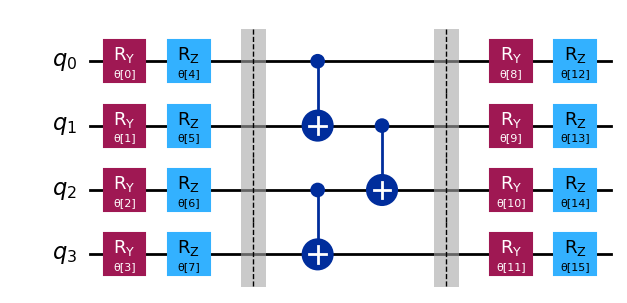

In [4]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(
    num_qubits=4,
    reps=1,
    entanglement="pairwise",
    insert_barriers=True
)
ansatz.decompose().draw("mpl", style="iqx")

Here we are creating an instance of EfficientSU2 class from the qiskitcircuit library, which is a quantum circuit designed for efficient and shallow encoding of classical data into quantum states .The EfficientSU2 class can be usefull for encoding classical datain quantum machine learning setting, like quantum support vector Machine or a quantum kernel method.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


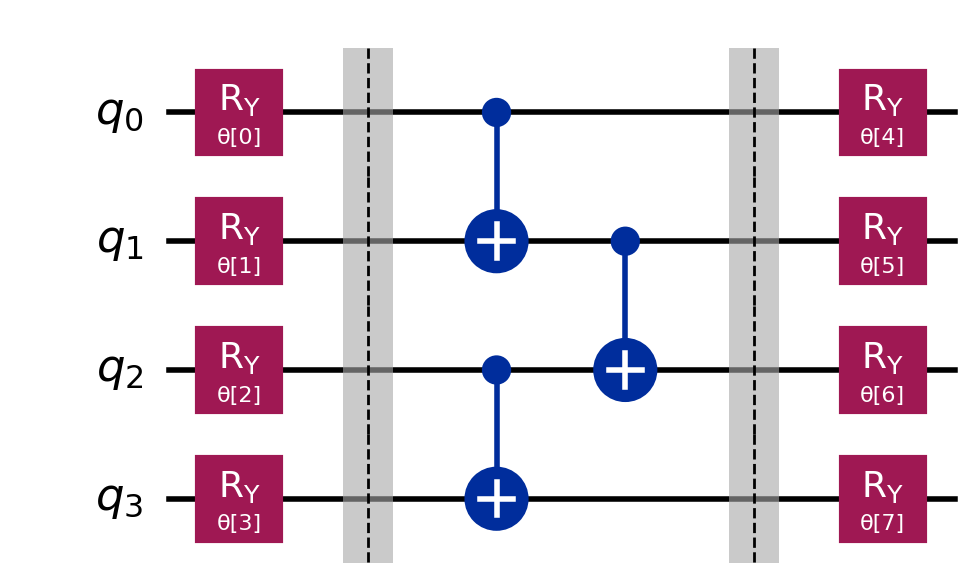

In [5]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(
    num_qubits=4,
    reps=1,
    entanglement="pairwise", insert_barriers=True,

)
ansatz.decompose().draw("mpl", style="iqx", scale=2)

Here we are creating an instance of RealAmplitudes class which is a quantumcircuit designed for encoding classical data into quantum states using real amplitudes(this is designed to work with classical data represented as real numbers).

#Classification

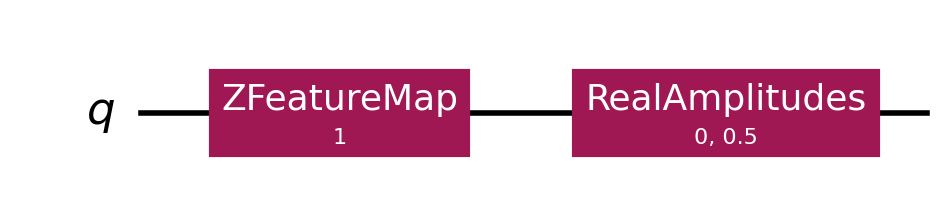

In [6]:
from qiskit.circuit.library import ZFeatureMap, RealAmplitudes
from qiskit.circuit.library import ZFeatureMap

num_features = 1
feature_map = ZFeatureMap(num_features)
model = RealAmplitudes(num_features, reps=1, entanglement="pairwise")

circuit = feature_map.compose(model)

data = np.array([1])
angles = np.arange(model.num_parameters) / model.num_parameters
bound = circuit.assign_parameters(np.concatenate((data, angles)))

bound.draw("mpl", style="iqx", scale=2)

We have the ZFeatureMap class from  qiskit library used to create  quantum circuit which maps classical input data into quantum states. The compose function is used to combine the feature map with the real amplitudes Ansatz thus creating a complete circuit which takes the input data and applies the feature map followed by ansatz.The bind parameter functionis used for binding the input data and angles to the circuit so as the circuit can be executed with specific values for these parameter.hence the circuit can be executed on a quantum computer and the output state is measured to make predictions on the input data.

In [7]:
!pip install qiskit-aer

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


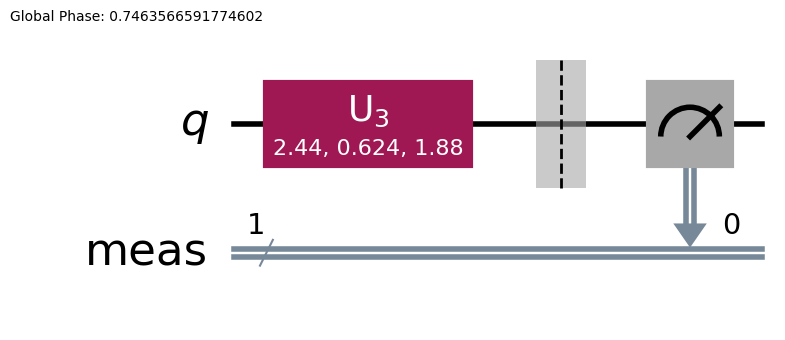

In [8]:
from qiskit import transpile
from qiskit_aer import Aer
bound.measure_all()
backend = Aer.get_backend("qasm_simulator")
transpiled =transpile(bound, backend)
transpiled.draw("mpl", style="iqx", scale=2)

The BasicAer module from Qiskit is used to cces different backend for simulating and executing circuits

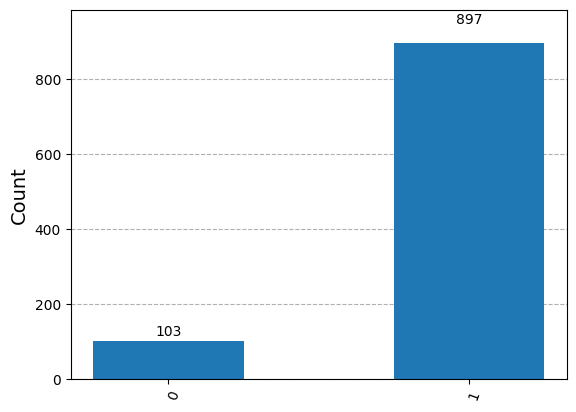

In [9]:
from qiskit.visualization import plot_histogram
result = backend.run(transpiled, shots=1000).result()
counts = result.get_counts()

plot_histogram(counts)

Here we will be using the run function to execute the Transpiled circuit on the selected backend, shots is the number of times the circuit should be executed,
get_count function is used to get the frequency of each measurement outcome
The output is a dictionary whre the keys are the measurement outcomesin binary format and the values are the frequencies of the outcome.

In [10]:
def parity(bitstring):
  return 1 if bitstring.count("1") % 2 == 0 else -1

This function takes in bitstring as input and performs a parity check on it,which is done by counting the number of 1's in the bitstring using the count method, then checking if that count is even or odd if even we get a 1 otherwise we get a -1.The parity function can be use to labelthe data based on even or odd number of 1's in the bistring.

###Sampling -based result

In [11]:
labels = {parity(bitstring): count/ 1000 for bitstring, count in counts.items()}
print(labels)

{1: 0.103, -1: 0.897}


Here the code takes the count obtained from running the circuit and for each bitstring it calculates the parity using the parity() function ,then it creates a new dictionary where the keys are parties (1 or -1) and the values are the probability of getting the party which is obtained by dividing the count of eh bitstring by the total number of shots (1000)

Expectation based results

In [12]:
expectation_value = sum(k * v for k, v in labels.items())
probability_for_1 = (1 - expectation_value)/2
expectation_labels = {1: probability_for_1, -1: 1 - probability_for_1}
print(expectation_labels)

{1: 0.897, -1: 0.10299999999999998}


Here the code calculates the expectation value of the Pauli-Z observable as the sum of the products of the eigenvalues and probabilities for each outcome,which then calculates the probability of measuring the state|1> by using

probability_for_1 = (1-expectation_value)/ 2


which is a formular based on the fact that the expectation vlue of the Pauli-Z observable for qubit in te state ∣ψ⟩=α∣0⟩+β∣1⟩ is given by

        E(Z)=α^2−β^2
and the probability of measuring the state ∣1⟩ is given is given by p(1)=β^2while for ∣0⟩ is given by p(0)=α^2.Which then creates a new dictionary exception_labels. where the keys are eigenvalues of Pauli-Z observable and the values are the probabilities of measuring each eigenvealue calculated from the expectation values.
The expectation_labels dictionary has the probbility of measuring the state ∣0⟩ and ∣1⟩, which is calculated from the expectation values of the observable

Lets have a 2-Fetures Example

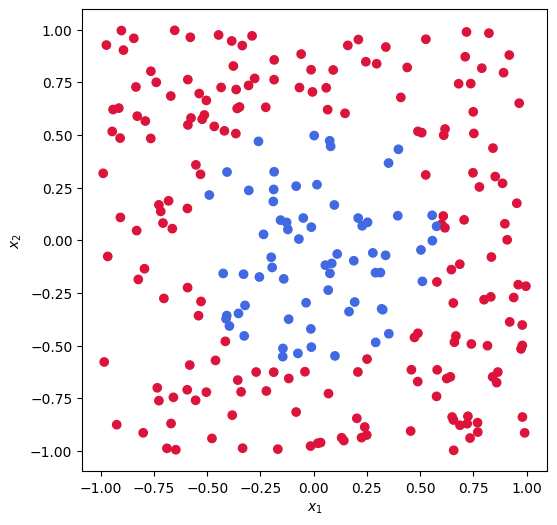

In [13]:
from data_generators import circle

points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


This code generates a dataset of 2D points, each belonging to one of two classes, visually distinguished by different colors. The points are created using a predefined circle function, which takes an integer num_points as input and returns a tuple with two lists: one containing the 2D coordinates of the points and the other containing their labels (-1 or 1). The points are uniformly sampled from a square centered at the origin. Points are labeled as -1 if they fall inside a circle with a radius of 0.6, centered at the origin, and labeled as 1 otherwise.

Using qiskit only

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


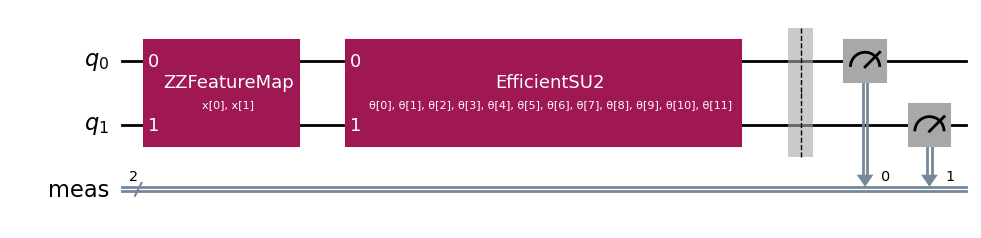

In [14]:
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2

num_features = 2

feature_map = ZZFeatureMap(num_features, reps=3)
model = EfficientSU2(num_features, reps=2, entanglement="pairwise")

circuit = feature_map.compose(model)
circuit.measure_all()
circuit.draw("mpl", style="iqx")

This code creates a quantum circuit that  is a combination of two components a feature map and a model circuit.ZZFeatureMap is a quantum feature map that maps a classical n-demensional real-valued input to quantum state.
The EfficientSU2 is a ansatz circuit that can be used for quantum state preparation(its a parameterized circuit that can be used to generate a large class of quantum states)

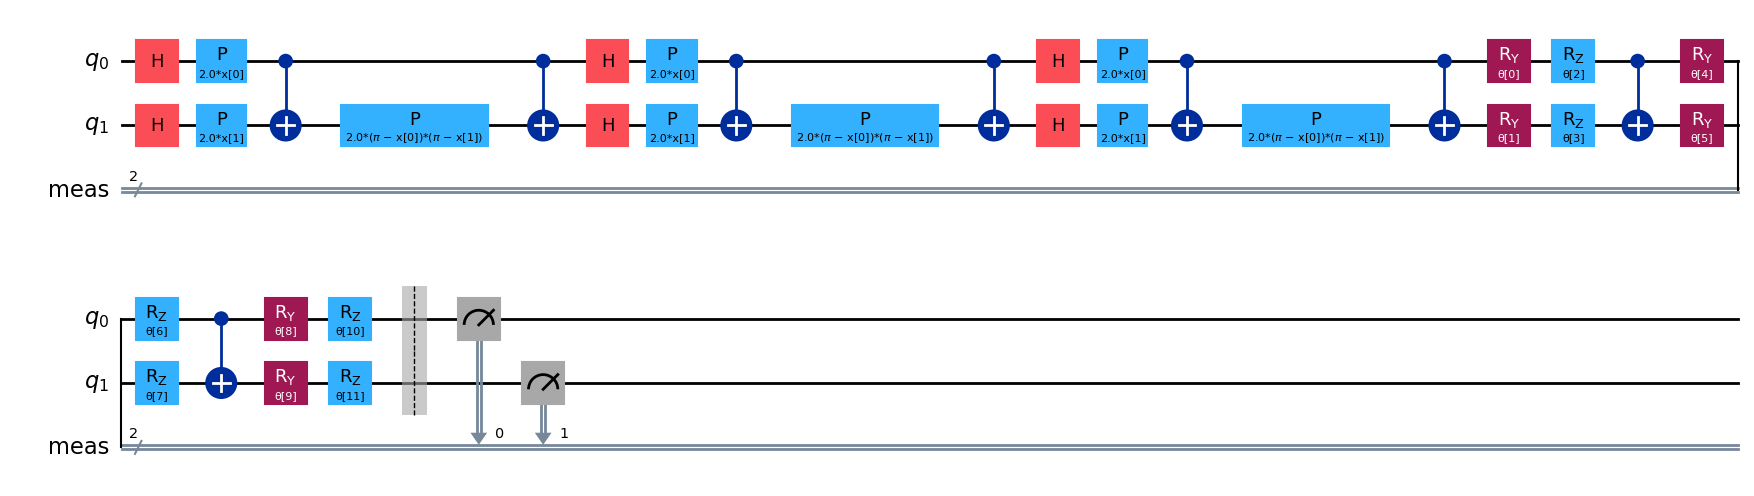

In [15]:
circuit.decompose().draw("mpl", style="iqx")

The decompose() function on the quantum cicuit is used to decompose the circuit into a set of simpler gates,this is performed by relacing any composite gates in the circuit like CNOT or CZ gate with a sequence of single-qubit and two-qubit gates..The output of the decomposed circuit will be a circuit with simpler gates making it easier for the underlying logic of the circuit and might help in the optimization of the circuit for a specific quantum device

In [16]:
backend = Aer.get_backend("qasm_simulator")
transpiled = transpile(circuit, backend)
shots = 1000

First we initialize the backend as  "qasm_simulator" using the BasicAer module,the "qasm_simulator" is a backend in qiskit that simulates the execution of quantum circuits on  classical computer.Then it transples the circuit using the transpile() function and the backend(meaning applying optimization techniques to the circuit to reduce the number of gates , thhe depth of the circuit , or te number of qubits required to implement the circuit(for more efficiency)).Lastly we set the number of shots to 1000( which is the number of times the circuit will be executed in the simulation) and each execution of the circuit will result in to a different measurment outcome leading to a more accurate simulation

In [17]:
def predict(theta, point, return_probabilities=False):
  bound = transpiled.assign_parameters(np.concatenate((point, theta)))
  counts= backend.run(bound, shots=shots).result().get_counts()

  pr_1 = 0
  for bitstr, count in counts.items():
    if parity(bitstr) == 1:
      pr_1 +=count / shots

    if return_probabilities:
      return pr_1

    return 1 if pr_1 >= 0.5 else 0

Here we have the predict() that takes three inputs( a set of parameters theta , a point , and a boolean flag (return_probabilities )) to predict the label of the point either 0 or 1,based on the results of running a quantum circuit on a quantum simulator. First we bind the parameters theta and point to the transpiled circuit using the assign_parameters() method.We run now the circuit on the backend with the specified no. of shots thus obtaining the measurment counts using (get_counts()).After that the function now iterates over the measurment counts and sums up the number of times the measurement outcome is even number of 1's,which determined using the parity() function,by checking the parity of the bitstring.The next function checks the value of return_probabilities flag,for if it is True.it returns the probability of getting a positive label,whichis the probability of measuring an even number of 1's,otherwise it returns the predicted label which is 1 if the probability of getting a positive label is greater than or equal to 0.5 and 0 otherwise

In [18]:
cutoff = 1e-1
def save_log(value):
  return np.log(max(cutoff, value))

Here is a rewrite of the text in the image:

The function described is called save_log(), and it takes one input: a numerical value. This function computes the natural logarithm of the input and applies a cutoff to the value.

The function first checks if the input is greater than the cutoff. If so, it calculates the natural logarithm of the input. If the input is less than or equal to the cutoff, it computes the natural logarithm of the cutoff instead.

The cutoff is a small positive value, typically around 1e-1, to ensure that the logarithm function does not encounter zero or negative values, which would result in a mathematical error.By using the cutoff, the function ensures that only positive values are used in the logarithm calculation, leading to a valid result.


The log-likelihood function for a binary classification problem is:

l(θ)=−i∑​(yi​logf(xi​,θ)+(1−yi​)log(1−f(xi​,θ)))



In [19]:
def loss(theta, X, y):
  loss_value = 0
  for X_i, y_i in zip(X, y):
    # Call predict directly with theta and X_i
    pr_1 = predict(theta, X_i, return_probabilities=True)
    loss_value -= y_i * save_log(pr_1) + (1 - y_i) * save_log(1 - pr_1)

  return loss_value

This function defines a loss function for binary classification problems. It uses a negative log-likelihood loss, which is a common approach in supervised machine learning. The loss is computed over a dataset X and its corresponding labels y. Additionally, the function takes in theta, which represents the model's parameters.

For each example in the dataset, the function calls a predict function, passing the current example along with theta. The predict function then returns the probability that the example belongs to the positive class. The loss_value is updated by adding the negative log-likelihood for the example based on the predicted probability. The total loss returned by the function is the sum of these negative log-likelihood values.

To avoid errors from taking the logarithm of zero, the function includes a small cutoff value. If the predicted probability falls below this cutoff, it is replaced with the cutoff value before proceeding.

In [20]:
!pip install qiskit-algorithms

In [21]:
from qiskit_algorithms.optimizers import COBYLA

one_zero_labels = (1 + np.array(labels)) / 2

cost = lambda theta: loss(theta, points.tolist(), one_zero_labels.tolist())
result = COBYLA().minimize(cost, x0=np.random.random(model.num_parameters))

The code uses the COBYLA optimizer to determine the optimal parameters (theta) for the quantum circuit, which consists of a feature map and a model. The goal is to minimize the loss function. This loss function is defined based on the probability of correctly classifying the input data points and their labels. Before optimization, the labels are transformed using the formula one_zero_labels = (1 + np.array(labels)) / 2, which converts the labels from the range [-1, 1] to [0, 1]. The COBYLA optimizer then works to minimize the loss function by adjusting the parameters (theta). The final optimized parameters are stored in the result variable.

In [22]:
predictions = [predict(result.x, X_i) for X_i in points.tolist()]

The code utilizes the optimal parameters obtained from the COBYLA optimizer to predict the labels for the dataset.

It initializes a list called predictions and iterates over each row in the dataset, represented by the points variable. During each iteration, the predict() function is called with the optimal parameters result.x and the current data point X_i. The predict() function returns the predicted label (either 0 or 1) for that input.

The predicted label is then added to the predictions list.

By the end of the iteration, the predictions list contains the predicted labels for all the data points in the dataset. These predictions can be used to assess the model’s performance by comparing them with the actual labels.

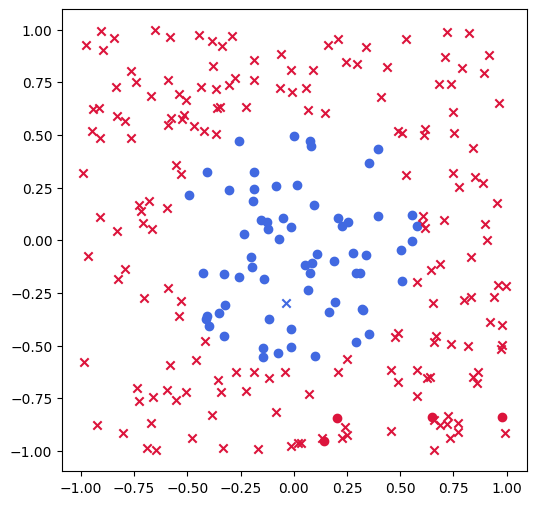

In [23]:
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(one_zero_labels, predictions)
]
plt.figure(figsize=(6, 6))
for point, marker, color in zip(points.tolist(), markers, colors):
  plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

This code is creating a scatter plot of the points that were generated by the circle() function

**using Qiskit Quantum Machine Learning**

In [24]:
!pip install qiskit-machine-learning

In [28]:
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler


# Create a QasmSampler instance using the Aer simulator backend
backend = Aer.get_backend("qasm_simulator")
sampler = Sampler()

# Initialize the VQC with the feature map and ansatz (model), using the sampler
vqc = VQC(num_qubits=2, feature_map=feature_map, ansatz=model, sampler=sampler)



<ipython-input-28-779850c3d5c9>:7: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


This code defines a variational quantum classifier (VQC) algorithm by specifying the number of qubits, feature map, model, and quantum backend to use for sampling

In [29]:
one_hot = np.array([[1, 0] if label == 1 else [0, 1] for label in labels])
vqc.fit(points, one_hot)

The code is training the VQC algorithm on the dataset using the fit() method.We do this by creating a one-hot encoding versions of the labels where by each row corresponds to a data point and each column corresponds to class. The fit() method optimizes the parameters of the variational circuit using the data and labels provided.

In [30]:
vqc_predictions = vqc.predict(points)

The code uses the predict() method from the VQC (Variational Quantum Classifier) algorithm to generate predictions for the dataset.

It calls the predict() method on the vqc object, passing in the dataset represented by the points variable. This method returns an array of predictions, where each entry corresponds to the predicted class of the respective data point.

The predict() method works by first mapping the input data to a quantum state using the feature map. It then runs the ansatz circuit on the quantum state to generate predictions. These predictions are obtained by measuring the output state of the quantum circuit.

The resulting vqc_predictions variable contains the predictions for each data point in the dataset. These can be used to assess the model’s performance by comparing the predictions with the actual labels.

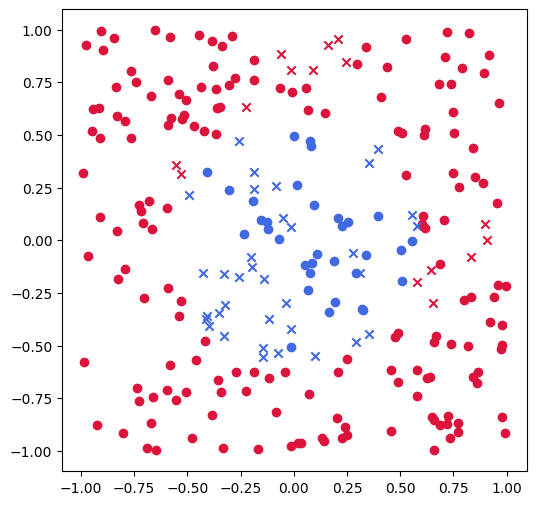

In [31]:
markers = [
    "o" if label == predicted_label else "x"
    for label,predicted_label in zip(labels, 2 * vqc_predictions[:, 0] - 1)
]

plt.figure(figsize=(6, 6))
for point, marker, color in zip(points.tolist(), markers, colors):
  plt.scatter(point[0], point[1], c=color, marker=marker)
plt.show()

The code is visualizing the results of the classification by plotting the points of the dataset along with their predicted labels.